In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('download.png')
img.shape

(279, 515, 3)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
red_plane = img[:,:,-1].copy()
green_plane = img[:,:,-2].copy()
blue_plane = img[:,:,-3].copy()

In [4]:
red_color = cv2.subtract(red_plane, gray)
green_color = cv2.subtract(green_plane, gray)
blue_color = cv2.subtract(blue_plane, gray)
yellow_color = cv2.subtract(gray, blue_plane)
megenta_color = cv2.subtract(gray, green_plane)
cyan_color = cv2.subtract(gray, red_plane)

In [5]:
def imshow(im, title,type = '', ):
    if type:
        plt.imshow(im, cmap = type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

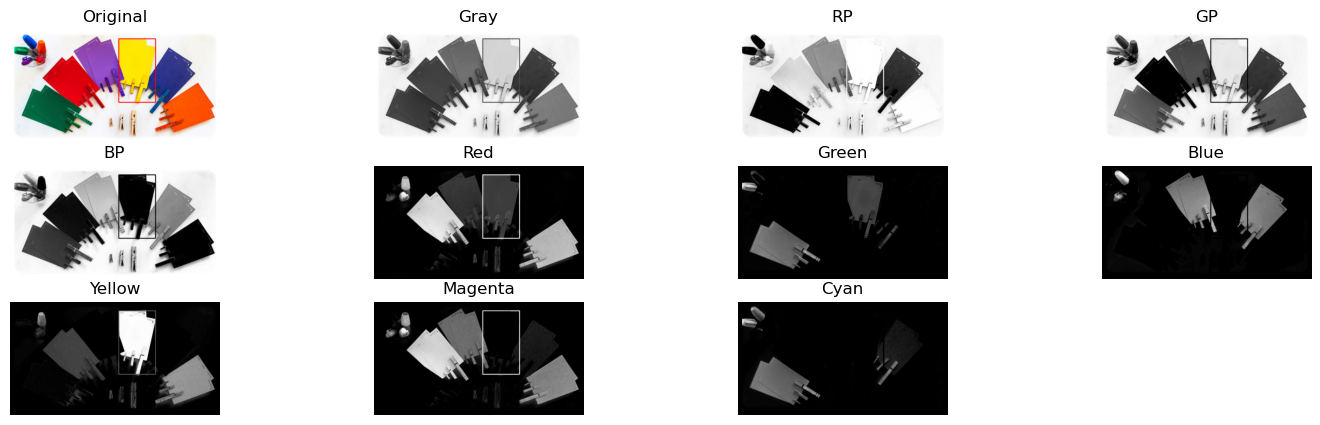

In [6]:
plt.figure(figsize=(18,5))
plt.subplot(3,4,1); imshow(img[:,:,::-1], 'Original')
plt.subplot(3,4,2); imshow(gray, 'Gray', 'gray')
plt.subplot(3,4,3); imshow(red_plane, 'RP', 'gray')
plt.subplot(3,4,4); imshow(green_plane, 'GP', 'gray')
plt.subplot(3,4,5); imshow(blue_plane, 'BP', 'gray')
plt.subplot(3,4,6); imshow(red_color, 'Red', 'gray')
plt.subplot(3,4,7); imshow(green_color, 'Green', 'gray')
plt.subplot(3,4,8); imshow(blue_color, 'Blue', 'gray')
plt.subplot(3,4,9); imshow(yellow_color, 'Yellow', 'gray')
plt.subplot(3,4,10); imshow(megenta_color, 'Magenta', 'gray')
plt.subplot(3,4,11); imshow(cyan_color, 'Cyan', 'gray')
plt.show()

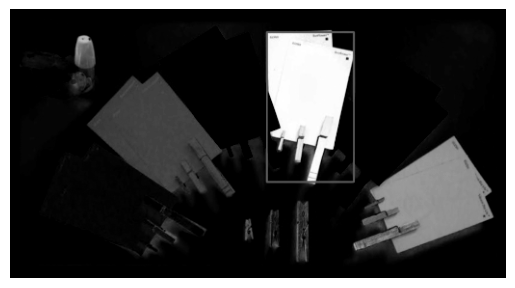

In [7]:
imshow(yellow_color,'','gray')

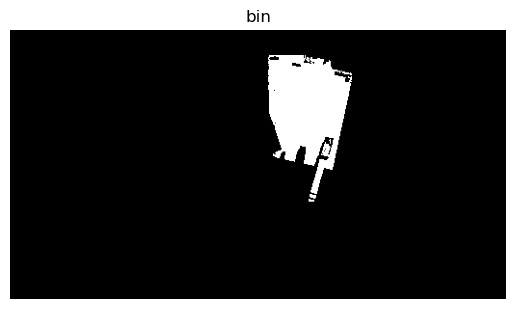

In [8]:
th, y_bw = cv2.threshold(yellow_color, 200, 255, cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [9]:
import skimage as ski

In [10]:
rp = ski.measure.regionprops(y_bw)
len(rp)

1

In [11]:
rp0 = rp[0]
y1,x1,y2,x2 = rp0.bbox   # y1,x1,y2,x2

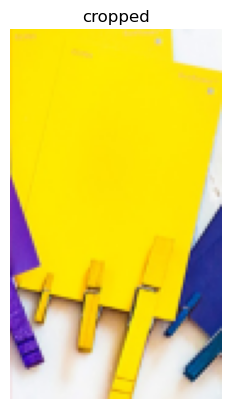

In [12]:
img_cropped = img[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

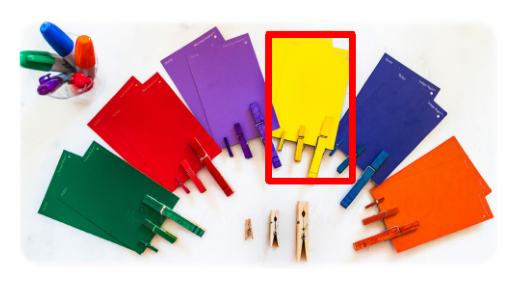

In [13]:
img_copy = img.copy()
cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')